# Problem Statement 

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store. Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

# Feature Data

Item_Identifier : Unique product ID

Item_Weight : Weight of product

Item_Fat_Content : Whether the product is low fat or not

Item_Visibility : The % of total display area of all products in a store allocated to the particular product

Item_Type : The category to which the product belongs

Item_MRP : Maximum Retail Price (list price) of the product

Outlet_Identifier : Unique store ID

Outlet_Establishment_Year : The year in which store was established

Outlet_Size : The size of the store in terms of ground area covered

Outlet_Location_Type : The type of city in which the store is located

Outlet_Type : Whether the outlet is just a grocery store or some sort of supermarket

Item_Outlet_Sales : Sales of the product in the particular store.

# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection  import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
train.isnull().sum()/train.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [10]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [11]:
test.isnull().sum()/test.shape[0] *100

Item_Identifier               0.000000
Item_Weight                  17.180074
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.269671
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
dtype: float64

**We have 17% and 28% Null values in Item_Weight and Outlet_Size in test dataset, train dataset respectively**

In [12]:
categorical = train.select_dtypes(include =[np.object])
print("Categorical Features in Train Set:",categorical.shape[1])

numerical= train.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Train Set:",numerical.shape[1])

Categorical Features in Train Set: 7
Numerical Features in Train Set: 5


<ipython-input-12-a2fd9ee81ae9>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = train.select_dtypes(include =[np.object])


Categorical Features:

Item_Identifier : categories of different products

Item_Fat_Content : It tells us whether it has high fat content or low fat content or regular fat content

Item_Type : It tells us whether it has meat or soft drink & such kind of things

Outlet_Identifier : It tells us the unique ID of the outlet

Outlet_Size : it tells us whether it is medium,high or small in size

Outlet_Location_Type : It tells us whether it is tier 1 or tier 2 & such kind of things

Outlet_Type : It tells us whether it is supermarket or grocerry store

In [13]:
categorical = test.select_dtypes(include =[np.object])
print("Categorical Features in Test Set:",categorical.shape[1])

numerical= test.select_dtypes(include =[np.float64,np.int64])
print("Numerical Features in Test Set:",numerical.shape[1])

Categorical Features in Test Set: 7
Numerical Features in Test Set: 4


<ipython-input-13-1d3ba2cb956d>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = test.select_dtypes(include =[np.object])


In [14]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


# ***Data Cleaning***

IN ORDER TO DEAL WITH THE MISSING VALUES

Mean --> average

The Mean value of a dataset is the average value i.e. a number around which a whole data is spread out. All values used in calculating the average are weighted equally when defining the Mean

In this case, in order to convert the missing values in the numerical column, we use mean of that particular column

Mode --> most repeated value

The mode is the value that appears most frequently in a data set. A set of data may have one mode, more than one mode, or no mode at all.The mode can be the same value as the mean and/or median, but this is usually not the case.

In this case, in order to convert the missing values in the categorical feature, we use the mode of that particular column

In [16]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

**Item_Weight and Outlet_Size have missing value so Now we can Mean and Mode method to replace missing value**

1.Iteam_Weight

In [17]:
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(1463, 976)

<AxesSubplot:xlabel='Item_Weight'>

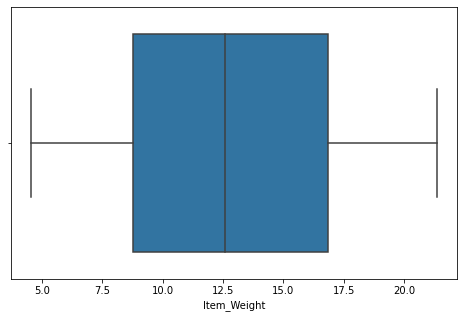

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=train)

<AxesSubplot:xlabel='Item_Weight'>

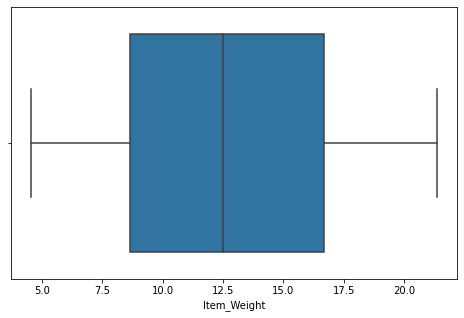

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=test)

**The Box Plots above clearly show no "Outliers" and hence we can impute the missing values with "Mean"**

In [20]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())
test["Item_Weight"]=test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [21]:
train["Item_Weight"].isnull().sum(),test["Item_Weight"].isnull().sum()

(0, 0)

**We have successfully replaced missing value with Mean Value of Item_Weight**

2.Outlet_Size 

In [22]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode())
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode())

In [23]:
train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(2410, 1606)

In [24]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
test['Outlet_Size'].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

Since the outlet_size is a categorical column, we can impute the missing values by "Mode"(Most Repeated Value) from the column

In [26]:
train["Outlet_Size"]=train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0])
test["Outlet_Size"]=test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0])

In [27]:
train["Outlet_Size"].isnull().sum(),test["Outlet_Size"].isnull().sum()

(0, 0)

We have successfully replaced Missing value with Mode values in Outlet_size categorical Coloumn

# Exploratory Data Analysis

In [28]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [29]:
train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

We have irregular Data in this columns like LF, reg So we have fixed them

In [30]:
train["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)
test["Item_Fat_Content"].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [31]:
train['Years_Established'] = train['Outlet_Establishment_Year'].apply(lambda x: 2020 - x) 
test['Years_Established'] = test['Outlet_Establishment_Year'].apply(lambda x: 2020 - x)

In [32]:
train["Item_Fat_Content"].value_counts()
#Now it looks Good and Proper Format

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [33]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,21
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,22
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,33


# DATA VISUALIZATION

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

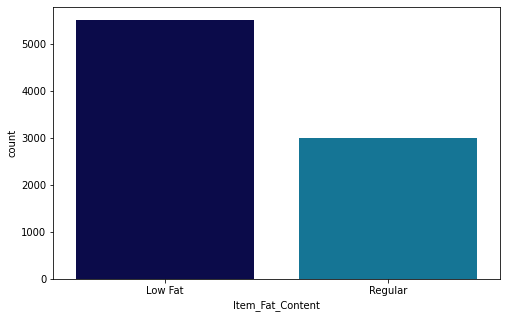

In [34]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train,palette='ocean')

**Observation** LowFat Item is most sales

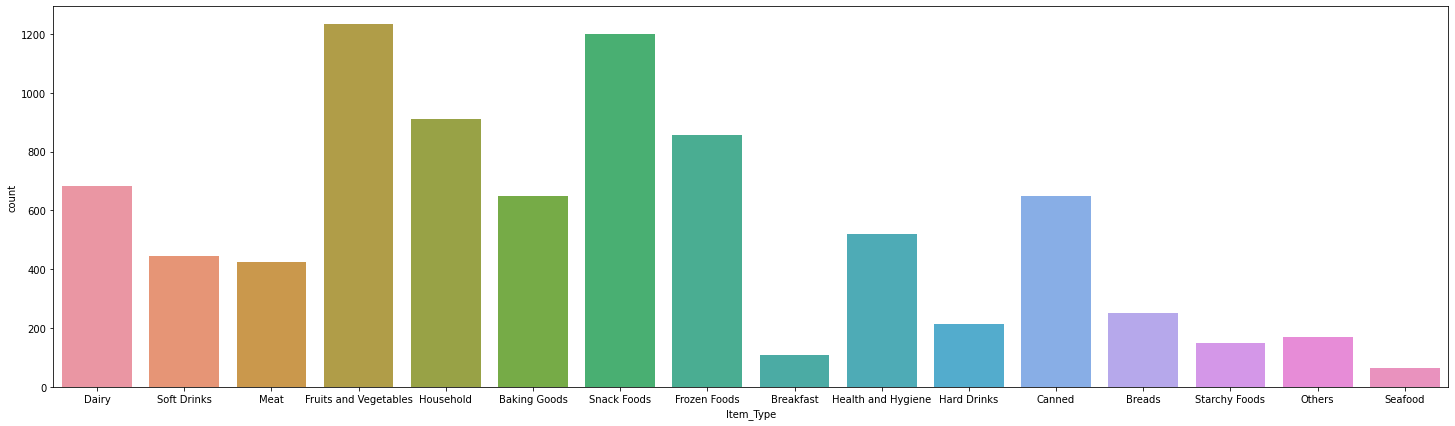

In [35]:
# Item_Type column
plt.figure(figsize=(25,7))
sns.countplot(x='Item_Type', data=train)
plt.show()

**Observation** 
1. Fruits and Vegis, Snack Foods have good sales 
2. Household and Frozen foods also have good sales

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

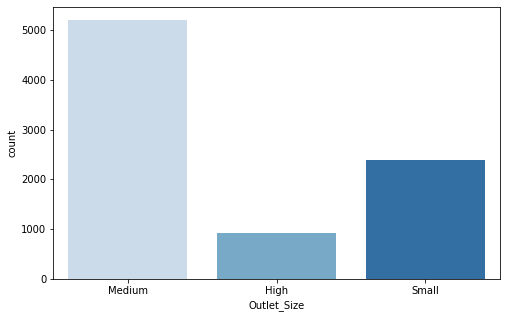

In [36]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=train,palette='Blues')

**Observation**
- Medium outlet_Size are more number of outlet, Hight Outlet have low number 
- Based on observation that Hight outlet size have more maintaiance and hight captial investment required so their count is vary low

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

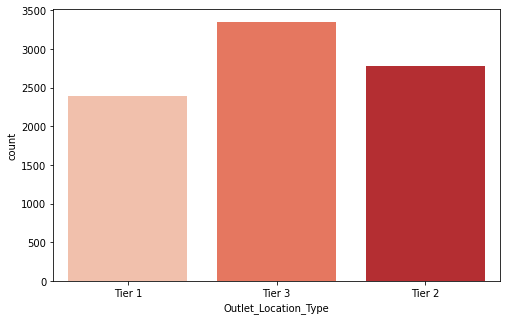

In [37]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=train,palette='Reds')


**Observation**
- In Tier 3 cities have more outlet

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

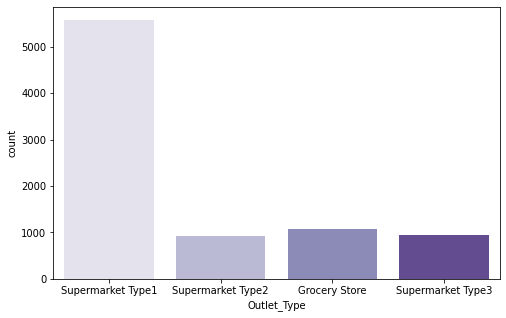

In [38]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train,palette='Purples')

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

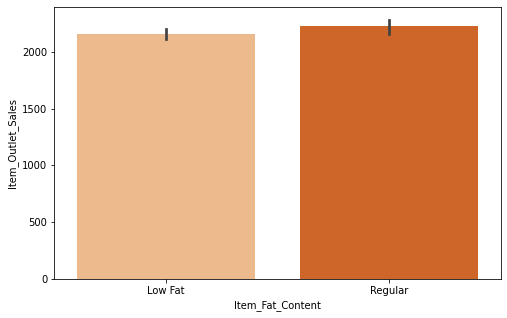

In [39]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=train,palette='Oranges')

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Item_Type'>

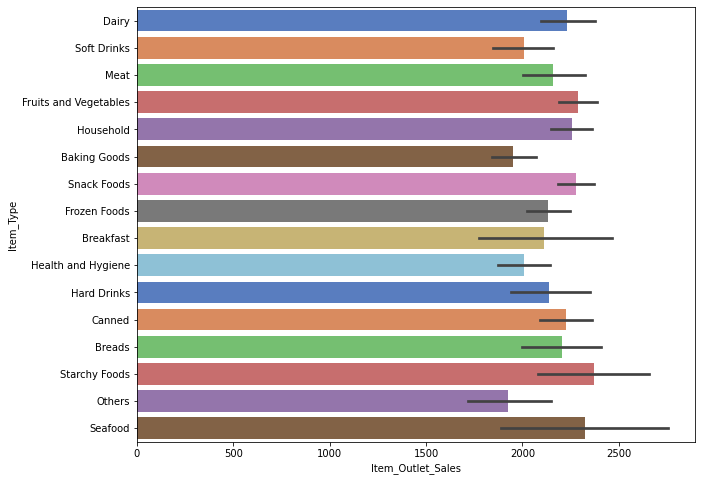

In [40]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,palette='muted')

**Obersvation**
-The products available were Fruits-Veggies and Snack Foods but the sales of Seafood and Starchy Foods seems higher and hence the sales can be improved with having stock of products that are most bought by customers.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Outlet_Size'>

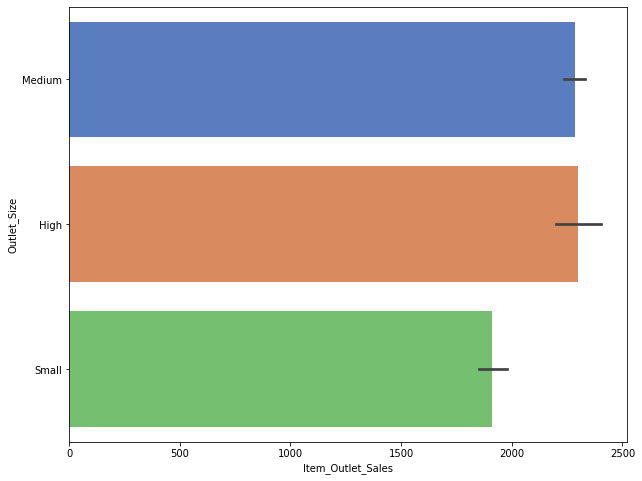

In [41]:
plt.figure(figsize=(10,8))
sns.barplot(y='Outlet_Size',x='Item_Outlet_Sales',data=train,palette='muted')

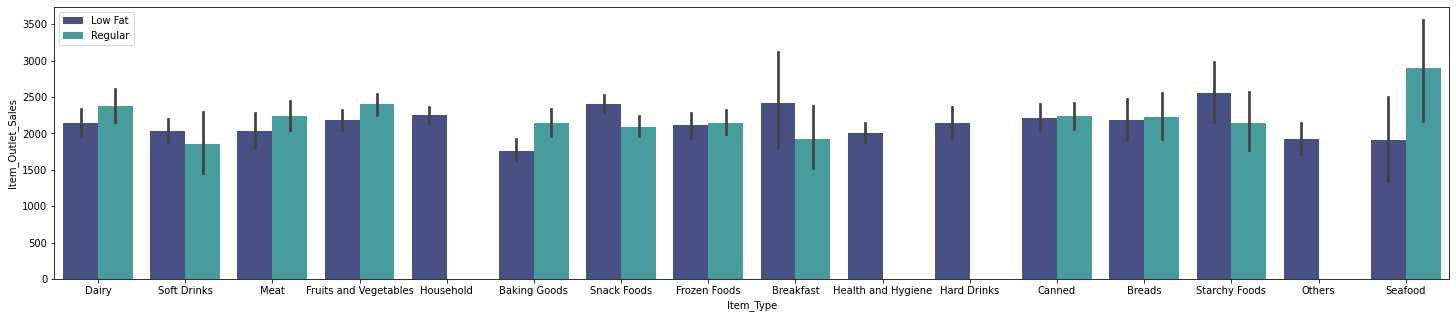

In [42]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=train,palette='mako')
plt.legend()

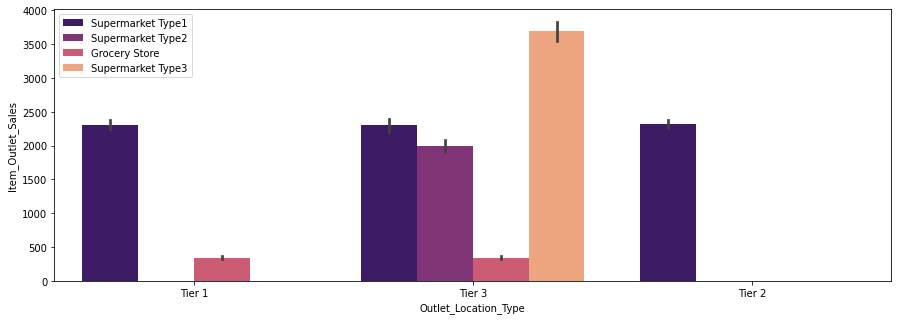

In [43]:
plt.figure(figsize=(15,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=train,palette='magma')
plt.legend()

**Observation**
- Based on above chart we can conclude that Tier 3 cities more sales margin and more outlet.
- For Increase out profit margin We have focus on Tier 2 and Tier 1 cities that have potential to increase margin

# Feature Engineering 

# LABEL ENCODING:

Label Encoding refers to the convertion of the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In simple terms, taking all the categorical values & transforming them into some numerical values

In [44]:
encoder = LabelEncoder()

In [45]:
var = ['Item_Identifier','Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type']

for i in var:
    train[i] = encoder.fit_transform(train[i])
    
for i in var:
    test[i] = encoder.fit_transform(test[i])

In [46]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_Established
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,21
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,11
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,21
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,22
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,33


There are some columns that needs to be dropped as they don't seem helping our analysis

In [47]:
train = train.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)
test= test.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [48]:
X= train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']]
y= train['Item_Outlet_Sales']

**SPLITTING THE DATA INTO TRAINING DATA & TESTING DATA**

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=22)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


In [51]:
#Feature Scaling 
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

# Model Building 

**Linear Regression**

In [52]:
LR = LinearRegression(normalize=True)
LR.fit(X_train,y_train)

LinearRegression(normalize=True)

In [53]:
y_pred = LR.predict(X_test)
coef2 = pd.Series(LR.coef_,features).sort_values()

In [54]:
coef2

Item_Visibility        -1600.625081
Outlet_Location_Type    -435.491074
Outlet_Size             -340.852291
Years_Established         -1.517854
Item_Weight                0.136562
Item_Type                  1.701081
Item_MRP                  15.621770
Item_Fat_Content          34.981870
Outlet_Type             1009.078566
dtype: float64

<AxesSubplot:>

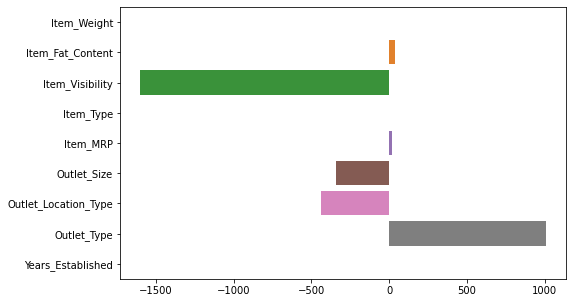

In [55]:
plt.figure(figsize=(8,5))
sns.barplot(LR.coef_,features)

**Evaluation Matrics**

**R-squared**
What does the R-squared value tell you?

-R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

In [56]:
from sklearn.metrics import r2_score
R2 = r2_score(y_test,y_pred)
R2

0.49471628502968856

**MAE and MSE**

**MSE**
- The Mean of Squared i difference between predicted value and Actual Value, 
- This yield a relative Metric in which the smaller the value is the better the fit of model.

**MAE**
-The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon.

**RMSE**
-RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [57]:
MAE= metrics.mean_absolute_error(y_test,y_pred)
MSE= metrics.mean_squared_error(y_test,y_pred)

In [58]:
print("MAE:-", MAE)
print("MSE:-", MSE)

MAE:- 932.9430372238918
MSE:- 1561490.3375619508


In [59]:
from math import sqrt
rmse = sqrt(MSE)
print("Root Mean Squared Error:",rmse)

Root Mean Squared Error: 1249.596069760925


# Random Forest Regression 

In [60]:
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(X_train,y_train)

# Making Predictions
y_pred = RF.predict(X_test)

In [61]:
coef3 = pd.Series(RF.feature_importances_, features).sort_values(ascending=False)
coef3

Item_MRP                0.543861
Outlet_Type             0.395478
Years_Established       0.059769
Item_Visibility         0.000271
Outlet_Location_Type    0.000265
Item_Weight             0.000256
Item_Type               0.000078
Outlet_Size             0.000021
Item_Fat_Content        0.000000
dtype: float64

<AxesSubplot:>

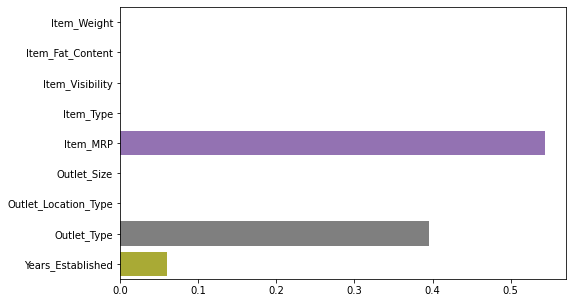

In [62]:
plt.figure(figsize=(8,5))
sns.barplot(RF.feature_importances_,features)

In [63]:
def cross_val(model_name,model,X,y,cv):
    
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),2)}')

In [64]:
cross_val(LR,LinearRegression(),X,y,5)

LinearRegression(normalize=True) Scores:
0.53
0.5
0.49
0.51
0.5
Average LinearRegression(normalize=True) score: 0.51


In [65]:
cross_val(RF,RandomForestRegressor(),X,y,5)

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) Scores:
0.57
0.54
0.52
0.55
0.56
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=22) score: 0.55


# XG-Boost Algorithm 

In [66]:
#Let's have all the features in X & target in Y
X = train.drop(columns='Item_Outlet_Sales', axis=1)
Y = train['Item_Outlet_Sales']

In [67]:
#x feature
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,9.30,0,0.016047,4,249.8092,1,0,1,21
1,5.92,1,0.019278,14,48.2692,1,2,2,11
2,17.50,0,0.016760,10,141.6180,1,0,1,21
3,19.20,1,0.000000,6,182.0950,1,2,0,22
4,8.93,0,0.000000,9,53.8614,0,2,1,33


In [68]:
#Y feature
Y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [73]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 9) (6818, 9) (1705, 9)


*Obervation*

X contains the original data which is 8523

X_trains contains 80% of the data which is 6818

X_test contains 20% of the data which is 1705

In [74]:
from xgboost import XGBRegressor
regressor = XGBRegressor()

In [75]:
#fit the model
#Training data is in X_train and the corresponding price value is in the Y_train
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [76]:
sales_data_prediction = regressor.predict(X_train)

In [77]:
# In order to check the performance of the model we find the R squared Value
r2_sales = metrics.r2_score(Y_train, sales_data_prediction)
print('R Squared value = ', r2_sales)

R Squared value =  0.8538142688327159


In [78]:
# prediction on test data
data_prediction = regressor.predict(X_test)

In [79]:
# R squared Value
r2_data = metrics.r2_score(Y_test, data_prediction)


In [80]:
print('R Squared value = ', r2_data)

R Squared value =  0.53389937234318


**Build Predictive System**

In [81]:
input_data = (20.75,0,0.0075,13,107.86,1,0,1,21)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)
#print("The initial value is ",prediction[0])


[1430.4747]


In [82]:
print("The sales for the first product in the dataset is predicted as ", prediction[0])

The sales for the first product in the dataset is predicted as  1430.4747


**Thus we have built the model to predict the sales & have performed the evaluation successfully**

In [83]:
#Let take few more data from test dataset
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_Established
0,20.750000,0,0.007565,13,107.8622,1,0,1,21
1,8.300000,1,0.038428,4,87.3198,1,1,1,13
2,14.600000,0,0.099575,11,241.7538,1,2,0,22
3,7.315000,0,0.015388,13,155.0340,1,1,1,13
4,12.695633,1,0.118599,4,234.2300,1,2,3,35


In [88]:
input_data = ( 12.69, 1, 0.118599, 4, 234.23, 1,2, 3, 35)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = regressor.predict(input_data_reshaped)
print(prediction)


print("The sales for the first product in the dataset is predicted as ", prediction[0])

[6141.4146]
The sales for the first product in the dataset is predicted as  6141.4146


In [89]:
import pickle

In [92]:
pickle.dump(regressor,open('regmodel.pkl','wb'))

In [94]:
pikled_model = pickle.load(open('regmodel.pkl','rb'))

In [96]:
pikled_model.predict(input_data_reshaped)

array([6141.4146], dtype=float32)